In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv("/content/covtype.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2590,56,2,212,-6,390,220,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2804,139,9,268,65,3180,234,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,2785,155,18,242,118,3090,238,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,2595,45,2,153,-1,391,220,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227132 entries, 0 to 227131
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           227132 non-null  int64  
 1   Aspect                              227132 non-null  int64  
 2   Slope                               227132 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    227132 non-null  int64  
 4   Vertical_Distance_To_Hydrology      227132 non-null  int64  
 5   Horizontal_Distance_To_Roadways     227132 non-null  int64  
 6   Hillshade_9am                       227132 non-null  int64  
 7   Hillshade_Noon                      227131 non-null  float64
 8   Hillshade_3pm                       227131 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  227131 non-null  float64
 10  Wilderness_Area1                    227131 non-null  float64
 11  Wilderness_Area2          

In [6]:
print(df.isnull().sum())

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        1
Hillshade_3pm                         1
Horizontal_Distance_To_Fire_Points    1
Wilderness_Area1                      1
Wilderness_Area2                      1
Wilderness_Area3                      1
Wilderness_Area4                      1
Soil_Type1                            1
Soil_Type2                            1
Soil_Type3                            1
Soil_Type4                            1
Soil_Type5                            1
Soil_Type6                            1
Soil_Type7                            1
Soil_Type8                            1
Soil_Type9                            1
Soil_Type10                           1
Soil_Type11                           1


In [7]:
print(df.describe())

           Elevation         Aspect          Slope  \
count  227132.000000  227132.000000  227132.000000   
mean     2936.174366     140.250986      11.736567   
std       220.866442     109.877092       6.581980   
min      1863.000000       0.000000       0.000000   
25%      2802.000000      52.000000       7.000000   
50%      2959.000000     103.000000      11.000000   
75%      3086.000000     231.000000      15.000000   
max      3849.000000     360.000000      64.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     227132.000000                   227132.000000   
mean                         243.559529                       34.337597   
std                          185.538377                       44.012278   
min                            0.000000                     -146.000000   
25%                           95.000000                        5.000000   
50%                          210.000000                       2

In [9]:
target = 'Cover_Type'
features = df.columns[df.columns != target]

In [13]:
scaler = StandardScaler()

df.dropna(subset=[target], inplace=True)
X = scaler.fit_transform(df[features])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Random Forest Classification Report:
              precision    recall  f1-score   support

         1.0       0.95      0.90      0.93     13646
         2.0       0.95      0.98      0.96     28748
         3.0       0.87      0.89      0.88       574
         4.0       0.96      0.97      0.96       432
         5.0       0.94      0.81      0.87       900
         6.0       0.86      0.86      0.86       498
         7.0       0.94      0.91      0.92       629

    accuracy                           0.95     45427
   macro avg       0.92      0.90      0.91     45427
weighted avg       0.95      0.95      0.95     45427



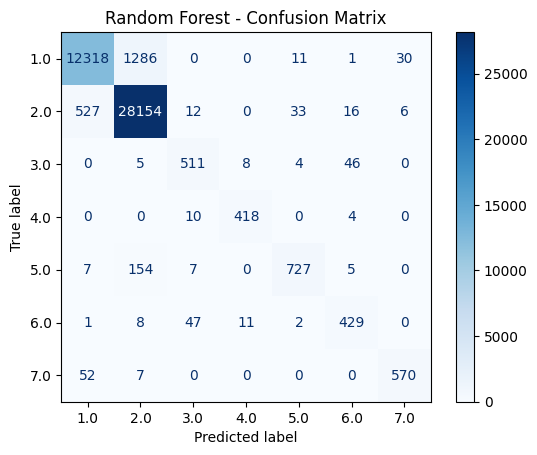

In [15]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues')
plt.title("Random Forest - Confusion Matrix")
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [14:22:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
              precision    recall  f1-score   support

         1.0       0.91      0.84      0.87     13646
         2.0       0.92      0.96      0.94     28748
         3.0       0.86      0.86      0.86       574
         4.0       0.97      0.95      0.96       432
         5.0       0.89      0.82      0.86       900
         6.0       0.83      0.87      0.85       498
         7.0       0.93      0.92      0.93       629

    accuracy                           0.92     45427
   macro avg       0.90      0.89      0.90     45427
weighted avg       0.92      0.92      0.92     45427



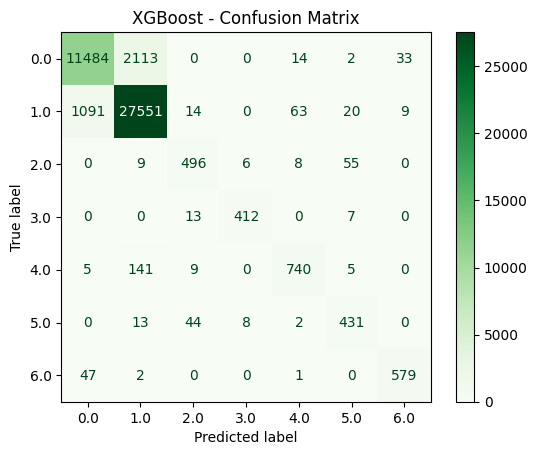

In [18]:
xgb_model = XGBClassifier(objective='multi:softmax', num_class=7, eval_metric='mlogloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train - 1) # Subtract 1 to make labels zero-indexed
y_pred_xgb = xgb_model.predict(X_test) + 1 # Add 1 back to predictions

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test - 1, cmap='Greens') # Subtract 1 for confusion matrix as well
plt.title("XGBoost - Confusion Matrix")
plt.show()

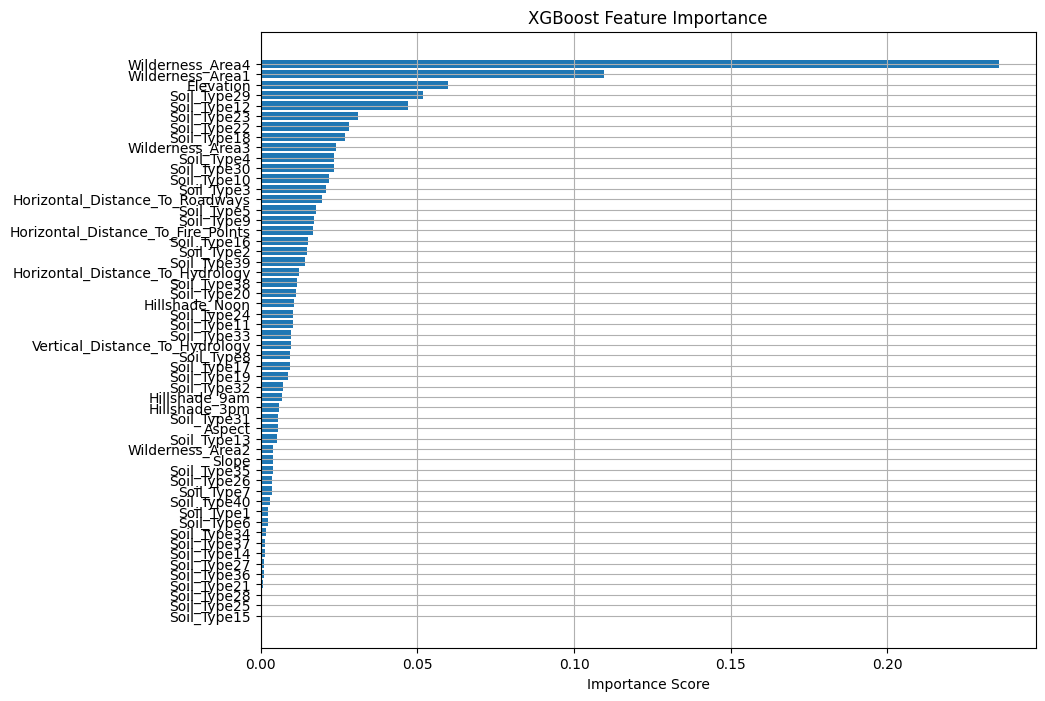

In [19]:
importances = xgb_model.feature_importances_
feature_names = df[features].columns

plt.figure(figsize=(10, 8))
sorted_idx = np.argsort(importances)[::-1]
plt.barh(range(len(importances)), importances[sorted_idx])
plt.yticks(range(len(importances)), feature_names[sorted_idx])
plt.xlabel('Importance Score')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50],
    'max_depth': [10, None],
    'min_samples_split': [2]
}


X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=0.1, stratify=y_train, random_state=42)

grid_search.fit(X_sample, y_sample)


print("Best parameters found:")
print(grid_search.best_params_)

print("Best cross-validated accuracy:")
print(grid_search.best_score_)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters found:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validated accuracy:
0.8643916933415542
